In [1]:
%run '../definitions.ipynb'
%run '../treemakers.ipynb'
%run '../Analysis_class.ipynb'

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
local_data = False

if local_data:
    raise NotImplementedError('Download data first, you git!')
else:
    processed_data_path = '/data/xenon/xams/run8/processed/data/'
    minitree_path = '/data/xenon/xams/run8/minitrees/'
    # 700, 750V Co after opening 3
    # run_names = get_run_list(processed_data_path, '170403_091058', '170403_091058')
    # 675, 725 V
    run_names = get_run_list(processed_data_path, '170403_093301', '170403_093301')
    

Run list contains 1 files


In [3]:
x = XAMSAnalysis(run_names, processed_data_path, minitree_path)

In [4]:
x.load()

In [5]:
# x.corr_pmtgains([2.36e6, 0, 0, 2.28e6, 1e6, 0, 0, 0], [700, 750], verbose=True)
x.corr_pmtgains([2.36e6, 0, 0, 2.28e6, 1e6, 0, 0, 0], [675, 725], verbose=True)

Using gains 249347.418703 and 183341.309940, factors 9.143868 and 12.872167, PMT1 and 2 respectively.


In [6]:
x.cut_interaction_exists()

Finite s1 selection: 5457 rows removed (92.19% passed)


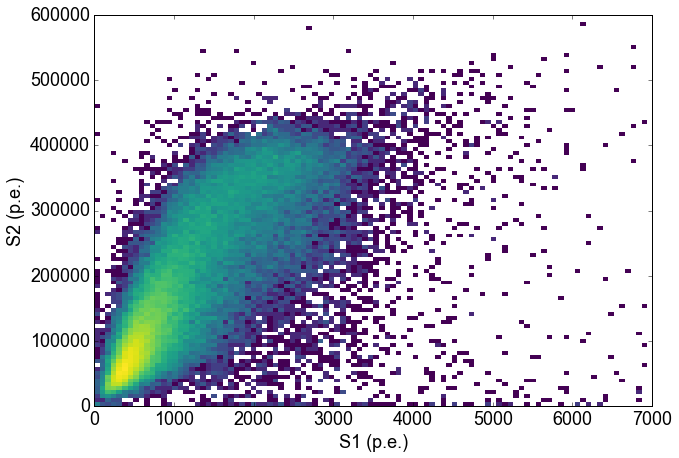

In [7]:
x.plot_s1s2(bins=100, norm=LogNorm(), range=((0, 7000), (0, 600e3)))
plt.show()

largest_other_s1 below 10 selection: 7806 rows removed (87.89% passed)


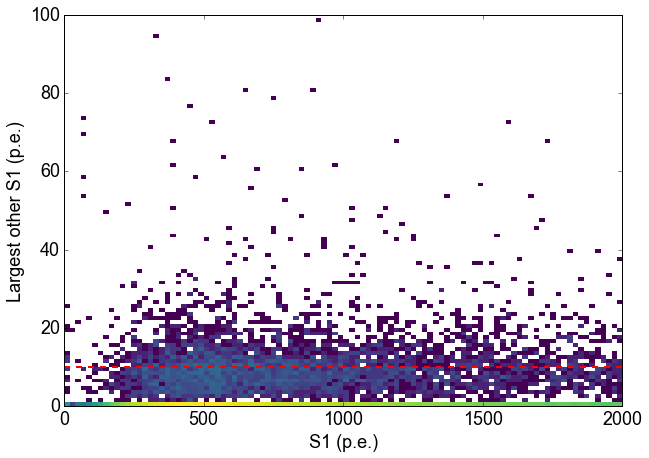

In [8]:
x.cut_largest_other_s1(largest_other_s1_max=10, plot=True, apply=True, bins=100, 
                       norm=LogNorm(), range=((0, 2000), (0, 100)))

largest_other_s2 below 500 selection: 13659 rows removed (75.88% passed)


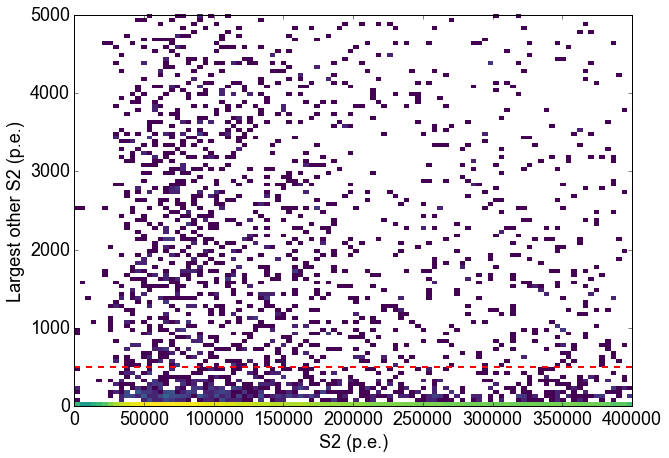

In [9]:
x.cut_largest_other_s2(largest_other_s2_max=500, 
                       plot=True, apply=True, bins=100, norm=LogNorm(), range=((0, 400e3), (0, 5000)))

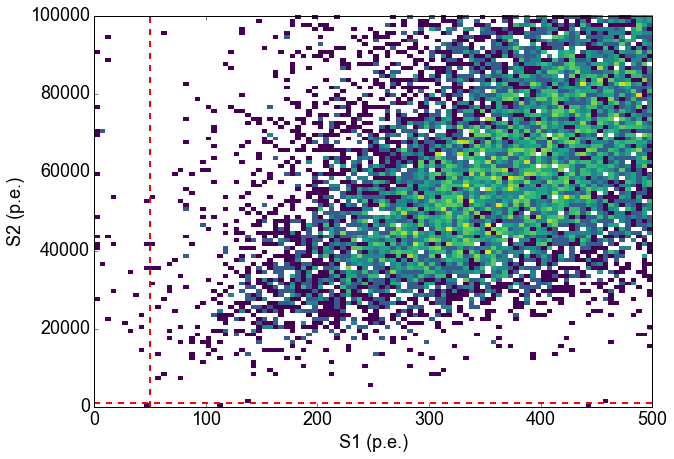

s1 above 50 selection: 52 rows removed (99.88% passed)
s2 above 1000 selection: 50 rows removed (99.88% passed)


In [10]:
x.cut_thresholds(s1_threshold=50, s2_threshold=1000,
    apply=True, plot=True, bins=100, norm=LogNorm(), range=((0, 500), (0, 100e3)))

(0, 700000.0)

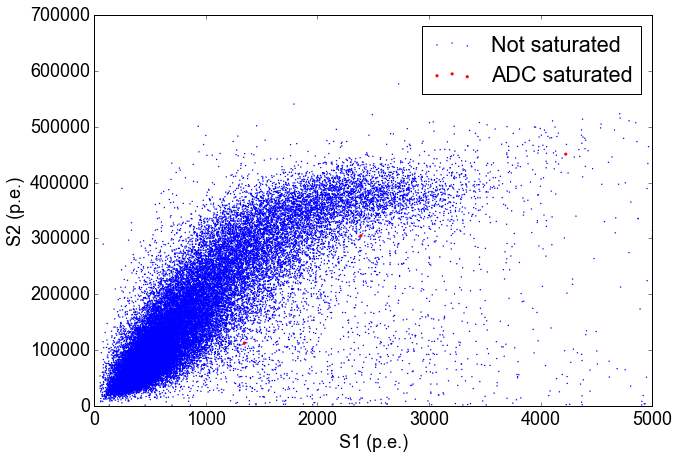

In [11]:
x.cut_saturation(apply=False, plot=True)
plt.xlim(0, 5000)
plt.ylim(0, 700e3)

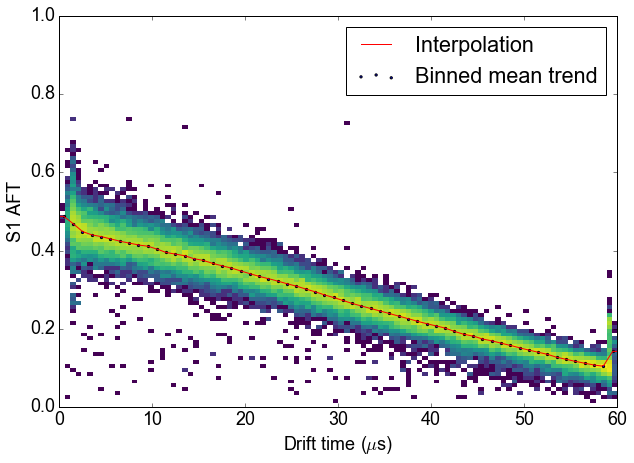

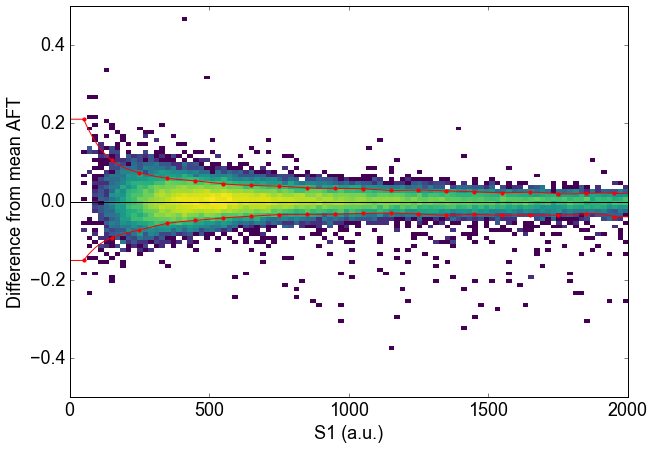

AFT_Upper selection: 2415 rows removed (94.37% passed)
AFT_Lower selection: 2416 rows removed (94.03% passed)


In [12]:
x.cut_s1_aft(apply=True, plot=True)


drift_time in [5, 55) selection: 6347 rows removed (83.31% passed)


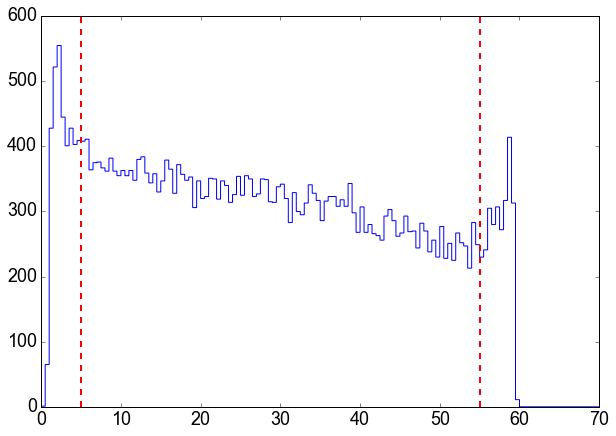

In [13]:
x.cut_drift_time(apply=True, drift_time_bounds=(5, 55), plot=True, range=(0, 70), bins=140, histtype='step')

In [14]:
def p2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2
x.corr_s1_ly_poly()

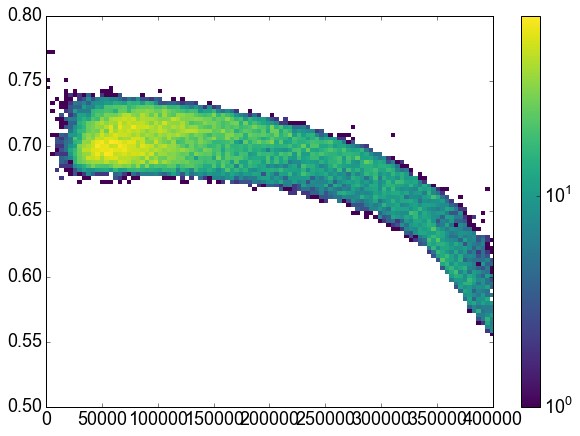

In [15]:
d = x.d
plt.hist2d(d['s2'], d['s2_area_fraction_top'], bins=100, norm=LogNorm(), range=((0, 400e3), (0.5, 0.8)))
plt.colorbar()
plt.show()

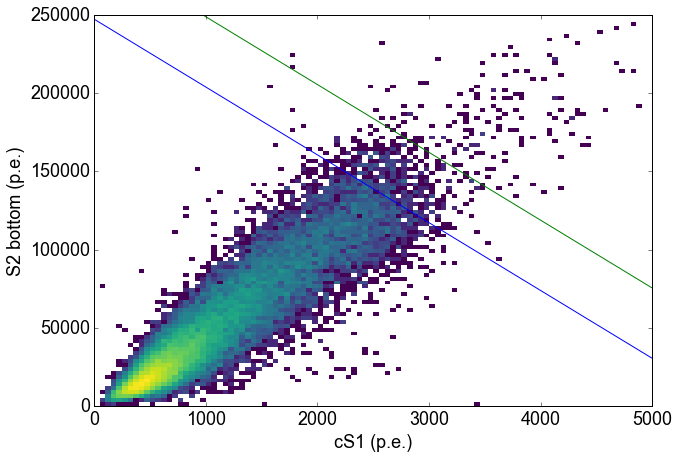

In [16]:
x.plot_cs1bs2(bins=100, norm=LogNorm(), range=((0, 5e3), (0, 250e3)))
x.plot_e_line(1100, s1_range=(0, 5000))
x.plot_e_line(1300, s1_range=(0, 5000))

In [17]:
x.add_ces()

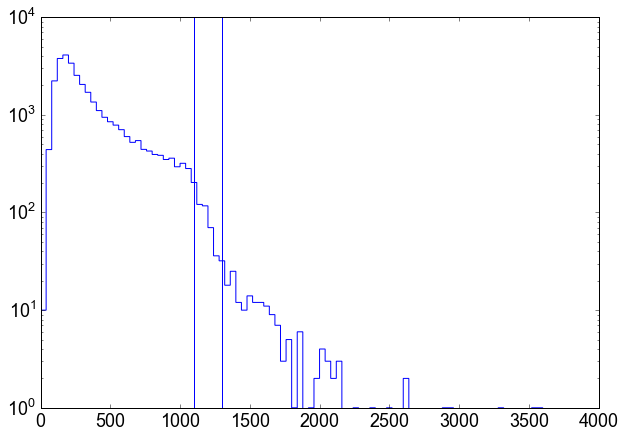

In [18]:
plt.hist(x.d['e_ces'], bins=100, histtype='step', range=((0, 4e3)))
plt.yscale('log')
plt.axvline(1100)
plt.axvline(1300)

plt.show()

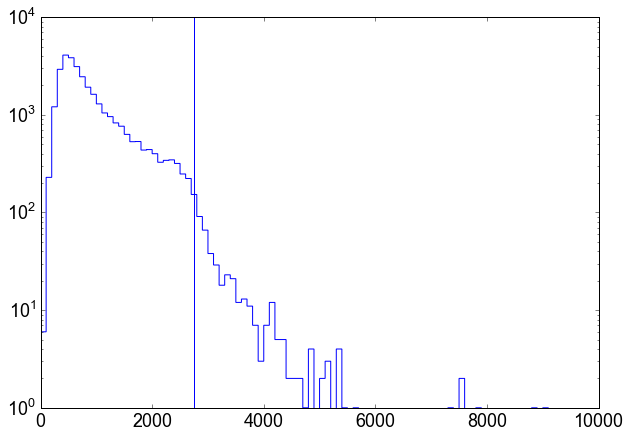

In [19]:
counts, bin_edges, _ = plt.hist(x.d['cs1'], bins=100, range=(0, 10e3), histtype='step')
plt.yscale('log')
# plt.ylim(0, 1000)
plt.axvline(2750)
plt.show()

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:44: InitialParamWarning: errordef is not given. Default to 1.
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:44: InitialParamWarning: Parameter a0 is floating but does not have initial step size. Assume 1.
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:44: InitialParamWarning: Parameter cutoff is floating but does not have initial step size. Assume 1.
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:44: InitialParamWarning: Parameter resolution is floating but does not have initial step size. Assume 1.


FCN = 633.372871617067 
 TOTAL NCALL = 143 
 NCALLS = 143 
 
 
 EDM = 1.437199169017294e-11 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a0,114.384,1.08531,0,0,,,
2,cutoff,2594.91,1.33965,0,0,,,
3,resolution,0.159151,0.00434437,0,0,,,


(0, 600)

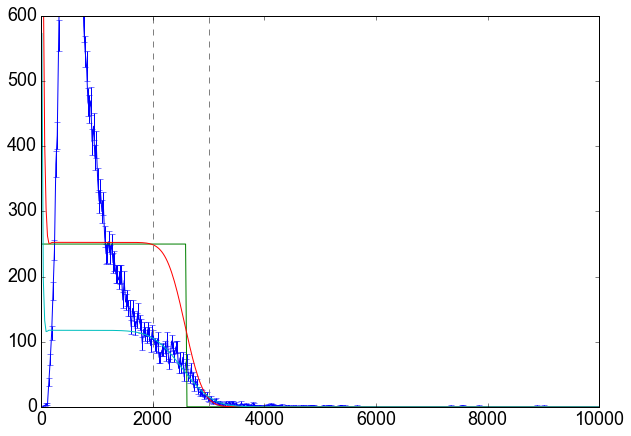

In [85]:


def sim_spec_raw(x, a0, cutoff):
    return a0 * (x < cutoff)

def gauss_norm(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

def sim_spec_smear(x, a0, cutoff, resolution):
    sim_spec_smear = np.zeros(len(x), dtype=float)
    bin_widths = np.unique(np.diff(x))
    assert len(bin_widths) == 1
    bin_width = bin_widths[0]
    for _x, _y in zip(x, sim_spec_raw(x, a0, cutoff)):
        mu = _x
        a0 = _y
        sigma = resolution * mu
        # print(a0, mu, sigma)
        # print(gauss_norm(x, mu, sigma))
        sim_spec_smear = bin_width * a0 * gauss_norm(x, mu, sigma) + sim_spec_smear
    return sim_spec_smear
    
    
# Build histogram for data
counts, bin_edges = np.histogram(x.d['cs1'], bins=400, range=(0, 10e3))
bin_centers = 0.5 * (bin_edges[:-1]+ bin_edges[1:])
errors = np.sqrt(counts)    
    
p0_s1 = [250, 2600, 0.1]
fit_range = [2000, 3000]

# plt.plot(bin_centers, counts, label='data')
plt.errorbar(bin_centers, counts, errors)
plt.plot(bin_centers, sim_spec_raw(bin_centers, p0_s1[0], p0_s1[1]), label='Guess, unsmeared')
plt.plot(bin_centers, sim_spec_smear(bin_centers, *p0_s1), label='Guess, smeared')
for _l in fit_range:
    plt.axvline(_l, color= 'gray', ls='--')

sel = (bin_centers >= fit_range[0]) & (bin_centers < fit_range[1])

def chi2(a0, cutoff, resolution):
    return sum((sim_spec_smear(bin_centers, a0, cutoff, resolution)[sel] - counts[sel])**2 / errors[sel])

m=Minuit(chi2, a0 = p0_s1[0], cutoff = p0_s1[1], resolution = p0_s1[2])
m.migrad()

popt_s1 = [m.values['a0'], m.values['cutoff'],m.values['resolution']]
plt.plot(bin_centers, sim_spec_smear(bin_centers, *popt_s1), label='Fit')


# plt.yscale('log')
# plt.ylim(1e-1, 1e4)
plt.ylim(0, 600)

In [83]:
m.values

{'a0': 114.38351479015205,
 'cutoff': 2594.909767882044,
 'resolution': 0.15915143592418238}

In [84]:
m.errors

{'a0': 1.0853131222151486,
 'cutoff': 1.3396457855016182,
 'resolution': 0.004344369663902182}

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:26: InitialParamWarning: errordef is not given. Default to 1.
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:26: InitialParamWarning: Parameter a0 is floating but does not have initial step size. Assume 1.
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:26: InitialParamWarning: Parameter cutoff is floating but does not have initial step size. Assume 1.


FCN = 43.439150398452526 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 1.7307174342590677 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a0,176.497,3.53307,0,0,,,
2,cutoff,136826,716.613,0,0,,,
3,resolution,0.1,1,0,0,,,FIXED


(0.1, 10000.0)

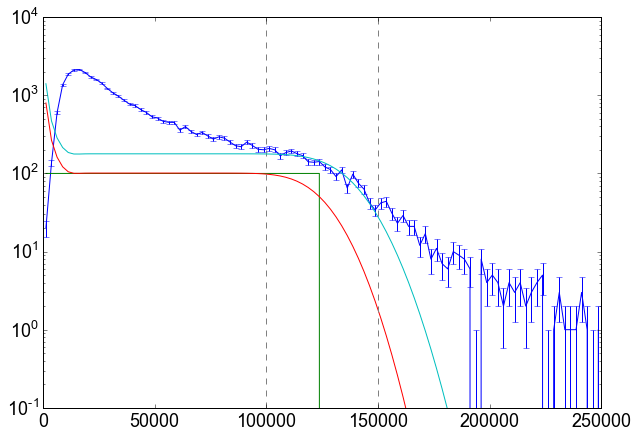

In [127]:
# Build histogram for data
counts, bin_edges = np.histogram(x.d['s2_bot'], bins=100, range=(0, 250e3))
bin_centers = 0.5 * (bin_edges[:-1]+ bin_edges[1:])
errors = np.sqrt(counts)
if 0 in errors:
    print('Warning: 0 in error list!')
    errors += 1 * (errors ==0)


p0_s2 = [100, 125e3, 0.1]
fit_range = [100e3, 150e3]

# plt.plot(bin_centers, counts, label='data')
plt.errorbar(bin_centers, counts, errors)
plt.plot(bin_centers, sim_spec_raw(bin_centers, p0_s2[0], p0_s2[1]), label='Guess, unsmeared')
plt.plot(bin_centers, sim_spec_smear(bin_centers, *p0_s2), label='Guess, smeared')
for _l in fit_range:
    plt.axvline(_l, color= 'gray', ls='--')

sel = (bin_centers >= fit_range[0]) & (bin_centers < fit_range[1])

def chi2(a0, cutoff, resolution):
    # Do we square the error again?
    return sum((sim_spec_smear(bin_centers, a0, cutoff, resolution)[sel] - counts[sel])**2 / errors[sel]**2)

m=Minuit(chi2, a0 = p0_s2[0], cutoff = p0_s2[1], resolution = p0_s2[2], fix_resolution=True)
         # error_a0 = 1, error_cutoff=100, error_resolution = 0.001)
m.migrad()

popt_s2 = [m.values['a0'], m.values['cutoff'],m.values['resolution']]
plt.plot(bin_centers, sim_spec_smear(bin_centers, *popt_s2), label='Fit')


plt.yscale('log')
plt.ylim(1e-1, 1e4)
# plt.ylim(0, 400)

In [125]:
m.values

{'a0': 176.49652486771092, 'cutoff': 136825.52310391146, 'resolution': 0.1}

In [126]:
m.errors

{'a0': 3.533068656814111, 'cutoff': 716.6131730234451, 'resolution': 1.0}